In [23]:
from fealpy.functionspace.lagrange_fe_space import LagrangeFESpace
from fealpy.mesh.triangle_mesh import TriangleMesh 

from poisson_2d import CosCosData, CosCosData_test
domain = [0, 1, 0, 1]
GD = 1
mesh = TriangleMesh.from_box(box = domain, nx = 5, ny = 5)
space = LagrangeFESpace(mesh, p = 1, spacetype = 'C', doforder = 'vdims')
pde = CosCosData()
pde_test = CosCosData_test

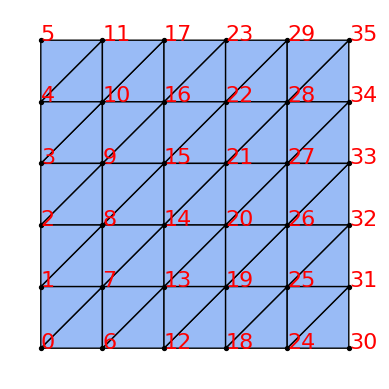

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes, showindex=True, 
               color='k', marker='o', markersize=8, fontsize=16, fontcolor='r')
plt.show()

uh: (36, 1) 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
dflag1: (36,) 
 [ True  True  True  True  True  True  True False False False False  True
  True False False False False  True  True False False False False  True
  True False False False False  True  True  True  True  True  True  True]


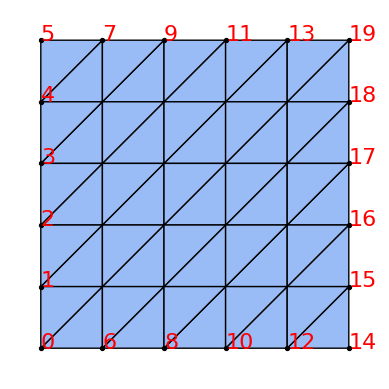

uh: (36, 1) 
 [[ 1.          0.80901699  0.30901699 -0.30901699 -0.80901699 -1.
   0.80901699  0.          0.          0.          0.         -0.80901699
   0.30901699  0.          0.          0.          0.         -0.30901699
  -0.30901699  0.          0.          0.          0.          0.30901699
  -0.80901699  0.          0.          0.          0.          0.80901699
  -1.         -0.80901699 -0.30901699  0.30901699  0.80901699  1.        ]]


In [25]:
uh = space.function(dim=1)
print("uh:", uh.shape, "\n", uh.T)
# 纯 Dirichlet 
dflag1 = space.is_boundary_dof()
print("dflag1:", dflag1.shape, "\n", dflag1)

ipoints = space.interpolation_points()
bd_points = ipoints[dflag1]

import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes, node=bd_points, showindex=True, 
               color='k', marker='o', markersize=8, fontsize=16, fontcolor='r')
plt.show()

uh.flat[dflag1] = pde.dirichlet(ipoints[dflag1])
print("uh:", uh.shape, "\n", uh.T)

uh: (36,) 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
dflag2: (36,) 
 [ True  True  True  True  True  True  True False False False False  True
  True False False False False  True  True False False False False  True
  True False False False False  True  True  True  True  True  True  True]


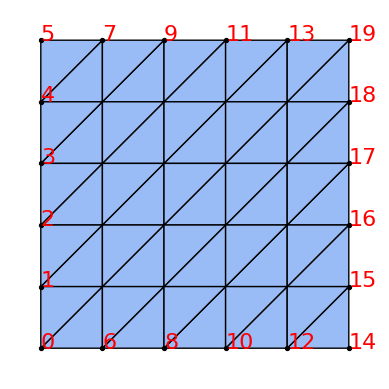

uh: (36,) 
 [ 1.          0.80901699  0.30901699 -0.30901699 -0.80901699 -1.
  0.80901699  0.          0.          0.          0.         -0.80901699
  0.30901699  0.          0.          0.          0.         -0.30901699
 -0.30901699  0.          0.          0.          0.          0.30901699
 -0.80901699  0.          0.          0.          0.          0.80901699
 -1.         -0.80901699 -0.30901699  0.30901699  0.80901699  1.        ]


In [26]:
uh = space.function(dim=1)
uh = uh.reshape(-1)
print("uh:", uh.shape, "\n", uh.T)

# 纯 Dirichlet 
dflag2 = space.boundary_interpolate(gD=pde.dirichlet, uh=uh, threshold=pde.is_dirichlet_boundary)
print("dflag2:", dflag2.shape, "\n", dflag2)

ipoints = space.interpolation_points()
bd_points = ipoints[dflag2]

import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes, node=bd_points, showindex=True, 
               color='k', marker='o', markersize=8, fontsize=16, fontcolor='r')
plt.show()

uh.flat[dflag2] = pde.dirichlet(ipoints[dflag2])
print("uh:", uh.shape, "\n", uh.T)